In [1]:
import pandas as pd 

In [2]:
import numpy as np 

In [3]:
import matplotlib.pyplot as pt
import seaborn as sns

In [4]:
df = pd.read_csv("Train.csv")
df.head(5)

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [5]:
x=[]
x.append(df['feature_1'].values)
x.append(df['feature_2'].values)
x.append(df['feature_3'].values)
x.append(df['feature_4'].values)
x.append(df['feature_5'].values)
x.append(df['target'].values)
y=df['target'].values
print(x)

[array([ 0.29341624, -0.83608408,  0.23642511, ...,  1.04417694,
       -1.2691729 , -1.88400025]), array([-0.94559871, -0.18922804,  0.13283602, ..., -0.89920649,
       -0.00505216, -0.84942743]), array([-0.42110515, -0.77640262, -0.14772298, ...,  1.73039905,
        1.85766873, -1.45227035]), array([ 0.40681602, -1.05383124,  0.69985396, ..., -1.87105676,
       -1.08036482,  0.48861308]), array([ 0.52566183,  0.59799685, -0.18736416, ...,  0.44251965,
        0.73633394,  1.4595758 ]), array([ -82.15466656,  -48.89796018,   77.2703707 , ..., -107.51050797,
        -47.34155781, -115.93900296])]


In [6]:
df = pd.DataFrame(data=np.array(x))

In [7]:
df1=df.transpose()

In [8]:
df1.head()

,0,1,2,3,4,5
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F1D53CDEB8>,
      dtype=object)

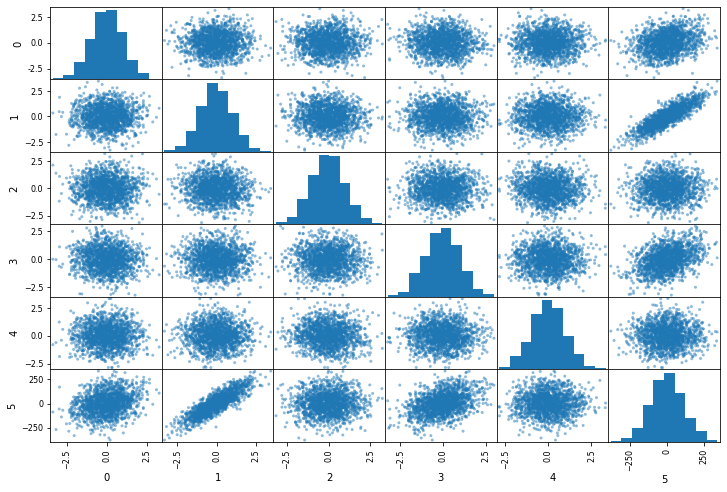

In [9]:
 from pandas.plotting import scatter_matrix
 attributes = [0,1,2,3,4,5]
 scatter_matrix(df1[attributes], figsize = (12,8))

In [10]:
def hypothesis(x,i,theta):
    hx=theta[0]
    for j in range(0,5):
        hx+=theta[j+1]*x[j][i]
    return hx


def error(x,y,theta):
    m=x[0].shape[0]
    error=0
    for i in range(0,m):
        hx= hypothesis(x,i,theta)
        error +=(hx-y[i])**2
    return error



def gradient(x,y,theta):
    grad=np.zeros((6,))
    m=x[0].shape[0]
    for i in range(0,m):
        hx=hypothesis(x,i,theta)
        grad[0]+= (hx-y[i])
        for j in range(0,5):
            grad[j+1]=(hx-y[i])*x[j][i]
    return grad


def gradientDescent(x,y,learningRate=0.001):
    theta=np.array([-400.0,0.0,0.0,0.0,0.0,0.0])
    itr=100
    errorList=[]
    thetalist=[]
    for i in range(0,itr):
        err=error(x,y,theta)
        errorList.append(err)
        thetalist.append(theta)
        grad=gradient(x,y,theta)
        for j in range(0,6):
            theta[j]-=learningRate*grad[j]
    return theta,errorList,thetalist

In [11]:
oupt_theta,errorList,thetalist=gradientDescent(x,y)

In [12]:
oupt_theta

array([  0.90902925,  14.48712373,   6.53171901,  11.16731286,
        -3.75721716, -11.22348849])

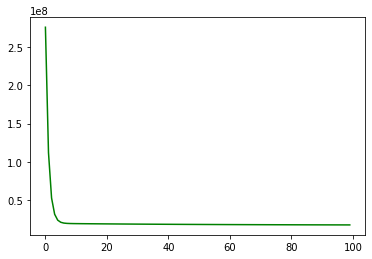

In [13]:
pt.plot(errorList,color='green')
pt.show()

In [14]:
dftest=pd.read_csv("Test.csv")

In [15]:
test=[]
test.append(dftest['feature_1'].values)
test.append(dftest['feature_2'].values)
test.append(dftest['feature_3'].values)
test.append(dftest['feature_4'].values)
test.append(dftest['feature_5'].values)

In [16]:
hx=np.zeros((test[0].shape[0],))
for i in range(0,test[0].shape[0]):
    hx[i]+=hypothesis(test,i,oupt_theta)
print(hx)

[ 4.62929377e+01  1.00439766e+01 -1.03137030e+01 -7.85752200e+00
  2.49803639e+00  2.46613069e+01 -8.29447921e+00 -8.96317523e+00
  7.83138089e+00  3.08726192e+01 -7.02677498e+00 -2.41347457e+01
  3.68428918e+00  3.76842069e+01  1.50842210e+01 -1.68050451e+01
  2.95383070e+01  4.11271296e+01 -1.17614626e+01  3.69465514e+01
 -1.12240458e+01 -4.84958280e+00 -1.75102019e+01  2.13802590e+01
 -5.25453163e+01 -1.02360783e+01  1.99943568e+01 -1.04312831e+01
  2.87938987e+01  7.66271670e+00 -1.91167329e+01 -1.56359532e+00
  5.08847606e+00  4.96785251e+01 -1.56857823e+01  3.05823755e+01
  3.78146623e+01  9.34636399e+00 -5.10122563e+01 -1.46730574e+01
  2.58786378e+00 -2.17551923e+01 -3.11511078e+01  9.42887988e+00
 -4.66632175e+01  7.48679223e+01 -1.49801128e+01  2.21909454e+01
 -4.41221129e+00 -4.57064492e+00 -1.10353590e+01 -2.43712042e-01
  4.36358538e+00  8.44669324e-01 -2.14856599e+01  1.11571170e+01
 -1.02302521e+01  1.28541593e+01 -3.30073011e+00 -1.50545299e+01
  9.75649823e+00 -1.17911

In [17]:
test1 = pd.DataFrame(data=np.array(test))
test2=test1.T
print(test2)

            0         1         2         3         4
0    1.015254  2.076209 -0.266435 -2.418088 -0.980503
1   -0.375021  0.953185  0.626719  0.704406 -0.355489
2   -1.024452  0.962991 -0.407942 -1.861274  0.455201
3   -2.489841  0.544802  0.601219 -0.607021 -1.314286
4   -0.384675 -0.833624  1.358552 -0.547932  0.411925
5    0.041547 -0.276119  2.236500 -0.994213  0.334767
6   -1.021536 -1.067035  0.439741  1.063519 -1.038031
7   -1.472741  1.221807 -0.608505 -0.986382 -0.585592
8   -0.528322  1.504864  0.915932  0.825660  0.212006
9    1.226962  1.183349 -0.264360  0.583738 -0.855756
10  -1.178140 -0.328367  0.522524 -1.095108 -0.118244
11  -0.443459  0.245295 -1.018018 -0.658340  1.009180
12   0.117454 -0.385655 -0.318667  0.628106 -0.847442
13   0.523924  0.929012  1.729464  0.066142 -0.361031
14   1.692179 -0.071975  0.114793 -0.266237  1.082706
15  -0.107991  0.106709 -0.510273  0.814182  0.720733
16   1.528942 -2.110348  1.218322 -1.207649 -0.188954
17   1.169885  0.206997  0.4

In [18]:
test2['Result']= hx
test2.head()

,0,1,2,3,4,Result
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503,46.292938
1,-0.375021,0.953185,0.626719,0.704406,-0.355489,10.043977
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201,-10.313703
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286,-7.857522
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925,2.498036


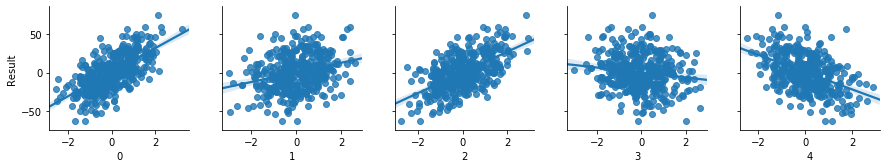

In [19]:
sns.pairplot(test2,x_vars=[0,1,2,3,4],y_vars=['Result'],kind='reg')